<a href="https://colab.research.google.com/github/AustinisCOld/AI-and-bussiness-systems-projects/blob/main/text_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

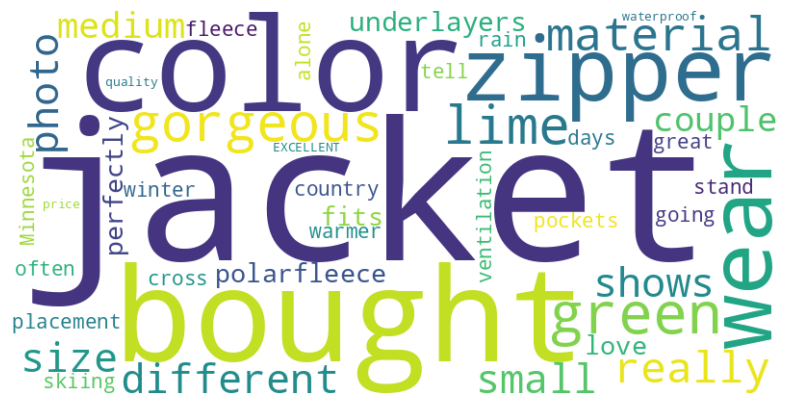

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Review text
review_text = """I bought this jacket in green and it is a gorgeous lime color...
the zipper and material aren't really so different in color like the photo shows.
I am a size small and bought a medium so I could wear it over a couple underlayers/polarfleece and it fits perfectly.
I love the placement of the pockets and the ventilation zippers.
I often wear it cross country skiing ovr a fleece or as a stand-alone jacket on warmer Minnesota winter days.
I can tell it's going to be a great rain jacket too...100% waterproof! EXCELLENT quality for the price!"""

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(review_text)
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Review text
review_text = """I bought this jacket in green and it is a gorgeous lime color...
the zipper and material aren't really so different in color like the photo shows.
I am a size small and bought a medium so I could wear it over a couple underlayers/polarfleece and it fits perfectly.
I love the placement of the pockets and the ventilation zippers.
I often wear it cross country skiing over a fleece or as a stand-alone jacket on warmer Minnesota winter days.
I can tell it's going to be a great rain jacket too...100% waterproof! EXCELLENT quality for the price!"""

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(review_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER if not already installed
nltk.download('vader_lexicon')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Input text
text = """I bought this jacket in green and it is a gorgeous lime color...the zipper and material aren't really so different in color like the photo shows.
I am a size small and bought a medium so I could wear it over a couple underlayers/polarfleece and it fits perfectly.
I love the placement of the pockets and the ventilation zippers.
I often wear it cross country skiing over a fleece or as a stand-alone jacket on warmer Minnesota winter days.
I can tell it's going to be a great rain jacket too...100% waterproof!
EXCELLENT quality for the price!"""

# Get sentiment scores
sentiment_scores = sia.polarity_scores(text)

# Determine overall sentiment
if sentiment_scores['compound'] >= 0.05:
    sentiment = "Positive"
elif sentiment_scores['compound'] <= -0.05:
    sentiment = "Negative"
else:
    sentiment = "Neutral"

# Print results
print("Sentiment Scores:", sentiment_scores)
print("Overall Sentiment:", sentiment)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Sentiment Scores: {'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'compound': 0.9803}
Overall Sentiment: Positive


In [ ]:
from textblob import TextBlob

# Input text
text = """I bought this jacket in green and it is a gorgeous lime color...the zipper and material aren't really so different in color like the photo shows. I am a size small and bought a medium so I could wear it over a couple underlayers/polarfleece and it fits perfectly. I love the placement of the pockets and the ventilation zippers. I often wear it cross country skiing over a fleece or as a stand-alone jacket on warmer Minnesota winter days. I can tell it's going to be a great rain jacket too...100% waterproof! EXCELLENT quality for the price!"""

# Perform subjectivity analysis
blob = TextBlob(text)
subjectivity_score = blob.sentiment.subjectivity  # Score between 0 (objective) and 1 (subjective)

# Define outcome based on score
if subjectivity_score > 0.5:
    outcome = "Subjective"
else:
    outcome = "Objective"

# Print results
print(f"Subjectivity Score: {subjectivity_score:.2f}")
print(f"Outcome: {outcome}")


Subjectivity Score: 0.57
Outcome: Subjective


In [ ]:
import pandas as pd
import nltk
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Sample spam dataset (replace with a larger dataset if available)
data = {
    'text': [
        "Congratulations! You've won a free iPhone. Click here to claim now!",
        "Hey, are we still on for lunch tomorrow?",
        "Get cheap loans now. No credit check required!",
        "I bought this jacket in green and it is a gorgeous lime color...",
        "URGENT! Your account has been compromised. Update your password now.",
        "Hi Mom, I'll be home for dinner at 7 PM.",
        "You have been selected for a $500 gift card. Click this link to redeem."
    ],
    'label': ['spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam']  # Spam or Ham (Non-Spam)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Text Preprocessing Function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return text

df['text'] = df['text'].apply(preprocess_text)  # Apply preprocessing

# Convert text into numerical features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])  # Convert text to word counts

# Transform counts to TF-IDF representation
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['label'], test_size=0.2, random_state=42)

# Train a Naïve Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)
import pandas as pd
import nltk
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Sample spam dataset (replace with a larger dataset if available)
data = {
    'text': [
        "Congratulations! You've won a free iPhone. Click here to claim now!",
        "Hey, are we still on for lunch tomorrow?",
        "Get cheap loans now. No credit check required!",
        "I bought this jacket in green and it is a gorgeous lime color...",
        "URGENT! Your account has been compromised. Update your password now.",
        "Hi Mom, I'll be home for dinner at 7 PM.",
        "You have been selected for a $500 gift card. Click this link to redeem."
    ],
    'label': ['spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam']  # Spam or Ham (Non-Spam)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Text Preprocessing Function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return text

df['text'] = df['text'].apply(preprocess_text)  # Apply preprocessing

# Convert text into numerical features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])  # Convert text to word counts

# Transform counts to TF-IDF representation
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['label'], test_size=0.2, random_state=42)

# Train a Naïve Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Given input text
input_text = "I bought this jacket in green and it is a gorgeous lime color...the zipper and material aren't really so different in color like the photo shows. I am a size small and bought a medium so I could wear it over a couple underlayers/polarfleece and it fits perfectly. I love the placement of the pockets and the ventilation zippers. I often wear it cross country_"

# Preprocess the input text
input_text = preprocess_text(input_text)

# Transform the input text using the same vectorizer and TF-IDF transformer
input_tfidf = tfidf_transformer.transform(vectorizer.transform([input_text]))

# Make a prediction
prediction = model.predict(input_tfidf)[0]

print("Prediction:", prediction)

Prediction: ham


In [5]:
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import joblib

# Load the dataset
file_path = 'ReviewData.csv'
df = pd.read_csv(file_path)

# Ensure "ReviewText" column exists
if 'ReviewText' not in df.columns:
    raise ValueError("The dataset must contain a 'ReviewText' column.")

# Sentiment and Subjectivity Analysis
def analyze_sentiment(text):
    return "positive" if TextBlob(str(text)).sentiment.polarity > 0 else "negative"

def analyze_subjectivity(text):
    return "subjective" if TextBlob(str(text)).sentiment.subjectivity > 0.5 else "objective"

df['pred_sentiment'] = df['ReviewText'].apply(analyze_sentiment)
df['pred_subjectivity'] = df['ReviewText'].apply(analyze_subjectivity)

# Spam Detection (Naive Bayes Model)
# Sample spam data for training (you might need a larger dataset for better accuracy)
spam_data = pd.DataFrame({
    'text': ["You won a free prize!", "Call now for a free vacation!", "Limited offer, buy now!",
             "This is a great product", "I love this movie", "What a wonderful day!"],
    'label': ["spam", "spam", "spam", "ham", "ham", "ham"]
})

# Train a simple Naive Bayes model
vectorizer = CountVectorizer()
model = make_pipeline(vectorizer, MultinomialNB())
model.fit(spam_data['text'], spam_data['label'])

# Predict spam/ham
df['pred_spam'] = model.predict(df['ReviewText'].astype(str))

# Save the updated dataset
df.to_csv('review_data_with_predictions.csv', index=False)
print("Analysis complete. Updated file saved as review_data_with_predictions.csv")



Analysis complete. Updated file saved as review_data_with_predictions.csv


In [8]:
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import joblib

# Load the dataset
file_path = 'review_data_with_predictions.csv'
df = pd.read_csv(file_path)

# Ensure necessary columns exist
required_columns = ['pred_sentiment', 'pred_subjectivity', 'pred_spam']
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"The dataset must contain a '{col}' column.")

# Convert categorical predictions to binary values
df['pred_sentiment'] = df['pred_sentiment'].map({'positive': 1, 'negative': 0})
df['pred_subjectivity'] = df['pred_subjectivity'].map({'subjective': 1, 'objective': 0})
df['pred_spam'] = df['pred_spam'].map({'spam': 1, 'ham': 0})

# Save the updated dataset
df.to_csv('review_data_with_binary_predictions.csv', index=False)
print("Conversion complete. Updated file saved as review_data_with_binary_predictions.csv")


Conversion complete. Updated file saved as review_data_with_binary_predictions.csv


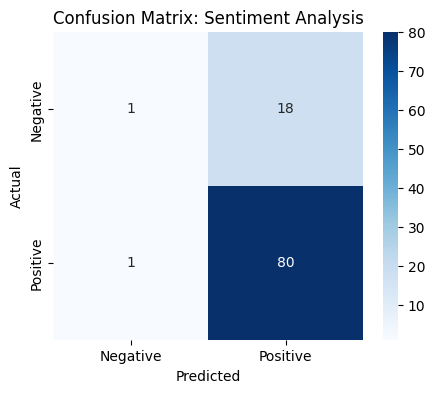

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Load the dataset
file_path = 'review_data_with_predictions.csv'
df = pd.read_csv(file_path)

# Ensure necessary columns exist
required_columns = ['Sentiment', 'pred_sentiment']
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"The dataset must contain a '{col}' column.")

# Convert categorical values to binary
df['Sentiment'] = df['Sentiment'].map({'positive': 1, 'negative': 0})
df['pred_sentiment'] = df['pred_sentiment'].map({'positive': 1, 'negative': 0})

# Compute confusion matrix
cm = confusion_matrix(df['Sentiment'], df['pred_sentiment'])

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Sentiment Analysis")
plt.show()
